# Testing of our point control sim

We'll make a basic simulator control loop (what the BRAIN trainer will do), and plot the output. Then we'll be able to use the same tools to visualize the learned policies.

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from bonsai_ai import Simulator, Config, Brain

In [6]:
import move_a_point_sim as sim

In [7]:
def run_sim_episode(sim, policy):
    """
    Given a sim and a policy, step through some iterations 
    of the simulator, returning the history of states.
    
    Args:
        sim: a PointSimulator
        policy: a function (SimState -> action dictionary)
    """
    k = 0 # Count steps, break out of infinite loops
    state_history = []
    reward_history = []
    state = sim.episode_start()
    state_history.append(state)

    is_terminal = False
    
    while not is_terminal:
        action = policy(state)
        (state, reward, is_terminal) = sim.simulate(action)
        state_history.append(state)
        reward_history.append(reward)
        k += 1
        if k > 1000:
            raise Exception("Simulation ran longer than 1000 steps. Stopping.")

    return state_history, reward_history

In [8]:
# Some silly policies
def random_policy(state):
    """
    Ignore the state, move randomly.
    """
    return {'direction_radians': random.random() * 2 * math.pi}

def go_up_policy(state):
    return {'direction_radians': math.pi / 2.0}

In [9]:
config = Config()
brain = Brain(config)
point_sim = sim.PointSimulator(brain, "move_a_point_sim")

states, rewards = run_sim_episode(point_sim, random_policy)

In [10]:
states[0]

{'current_x': 0.8223690146318672,
 'current_y': 0.619804447466461,
 'target_x': 0.9226958063196323,
 'target_y': 0.34093959121945816}

In [11]:
def plot_state_history(states):
    target = states[0]['target_x'], states[0]['target_y']
    
    xs = [s['current_x'] for s in states]
    ys = [s['current_y'] for s in states]

    fig, axes = plt.subplots(1,1)
    data = np.random.random([10, 2]) 
    
    # Pull out colors
    colors = np.linspace(0.1, 1, len(states))
    mymap = plt.get_cmap("Blues")
    # get the colors from the color map
    my_colors = mymap(colors)
    axes.scatter(xs, ys, s=40,
                     c=colors, edgecolors='None',
                     cmap=mymap)
    
    # Plot the target point in orange
    axes.scatter(target[0], target[1], s=40, c='orange', edgecolors='None')
    
    def bounds(lst):
        eps = 0.05
        return min(lst+[0])-eps, max(lst+[1])+eps
        
    axes.set_xlim(bounds(xs))
    axes.set_ylim(bounds(ys))
    

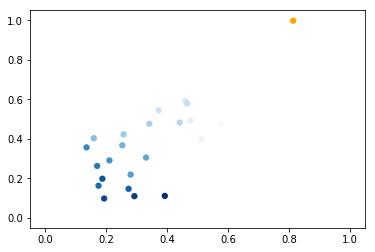

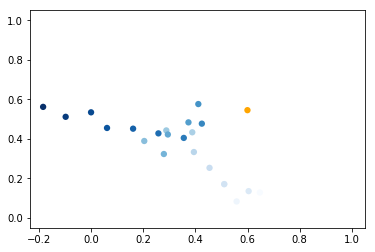

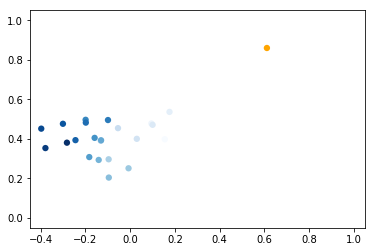

In [12]:
for i in range(3):
    states, rewards = run_sim_episode(point_sim, random_policy)
    plot_state_history(states)

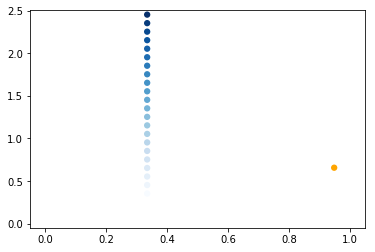

In [13]:
# Let's try the "go up" policy:
states, rewards = run_sim_episode(point_sim, go_up_policy)
plot_state_history(states)

In [14]:
rewards

[0.1444835978136659,
 0.058200299945756935,
 0.0073970734998764255,
 -0.1513559629527994,
 -0.4633500884614761,
 -0.7436019954487594,
 -0.9811773545269142,
 -1.1745617985788481,
 -1.3282146808289963,
 -1.4489442135157504,
 -1.5436120217596683,
 -1.6181254365605025,
 -1.6771983694211468,
 -1.724452556767595,
 -1.7626224118814404,
 -1.793760376987641,
 -1.819408416144066,
 -1.8407306034908588,
 -1.8586119674490842,
 -1.8737309596793095,
 -1]

# Next step: RL!

Now it's time to go write some inkling code to connect the simulator to a BRAIN. Then we'll train it.

In [15]:
point_sim.run()

True